In [1]:
# !pip3 install scikit-learn scipy matplotlib

In [2]:
# !pip3 install seaborn


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:

# Step 1: Load and preprocess the data
data = pd.read_csv('../part1/Cancer_Data.csv')  # Replace with your dataset's filename
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Encode diagnosis


## Step 1: Inspect the Dataset
- Purpose: Understand data types, detect missing values, and check for anomalies.


In [5]:
print(data.shape)  # Get the number of rows and columns


(569, 33)


In [6]:
print(data.columns)  # Display all column names


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [7]:
print(data.info())  # Summary of data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
print(data.describe())  # Statistical summary of numerical features


                 id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min  

## Step 2: Check for Missing Values

In [9]:
print(data.isnull().sum())  # Count missing values in each column

# data.fillna(method='ffill', inplace=True)  # Forward-fill as an example


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Step 2: Visualize Class Distribution
- Understand the data imbalance

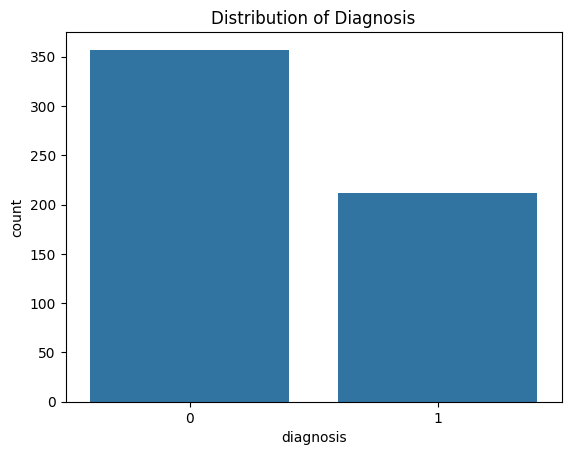

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()


## Step 4: Check Feature Distributions

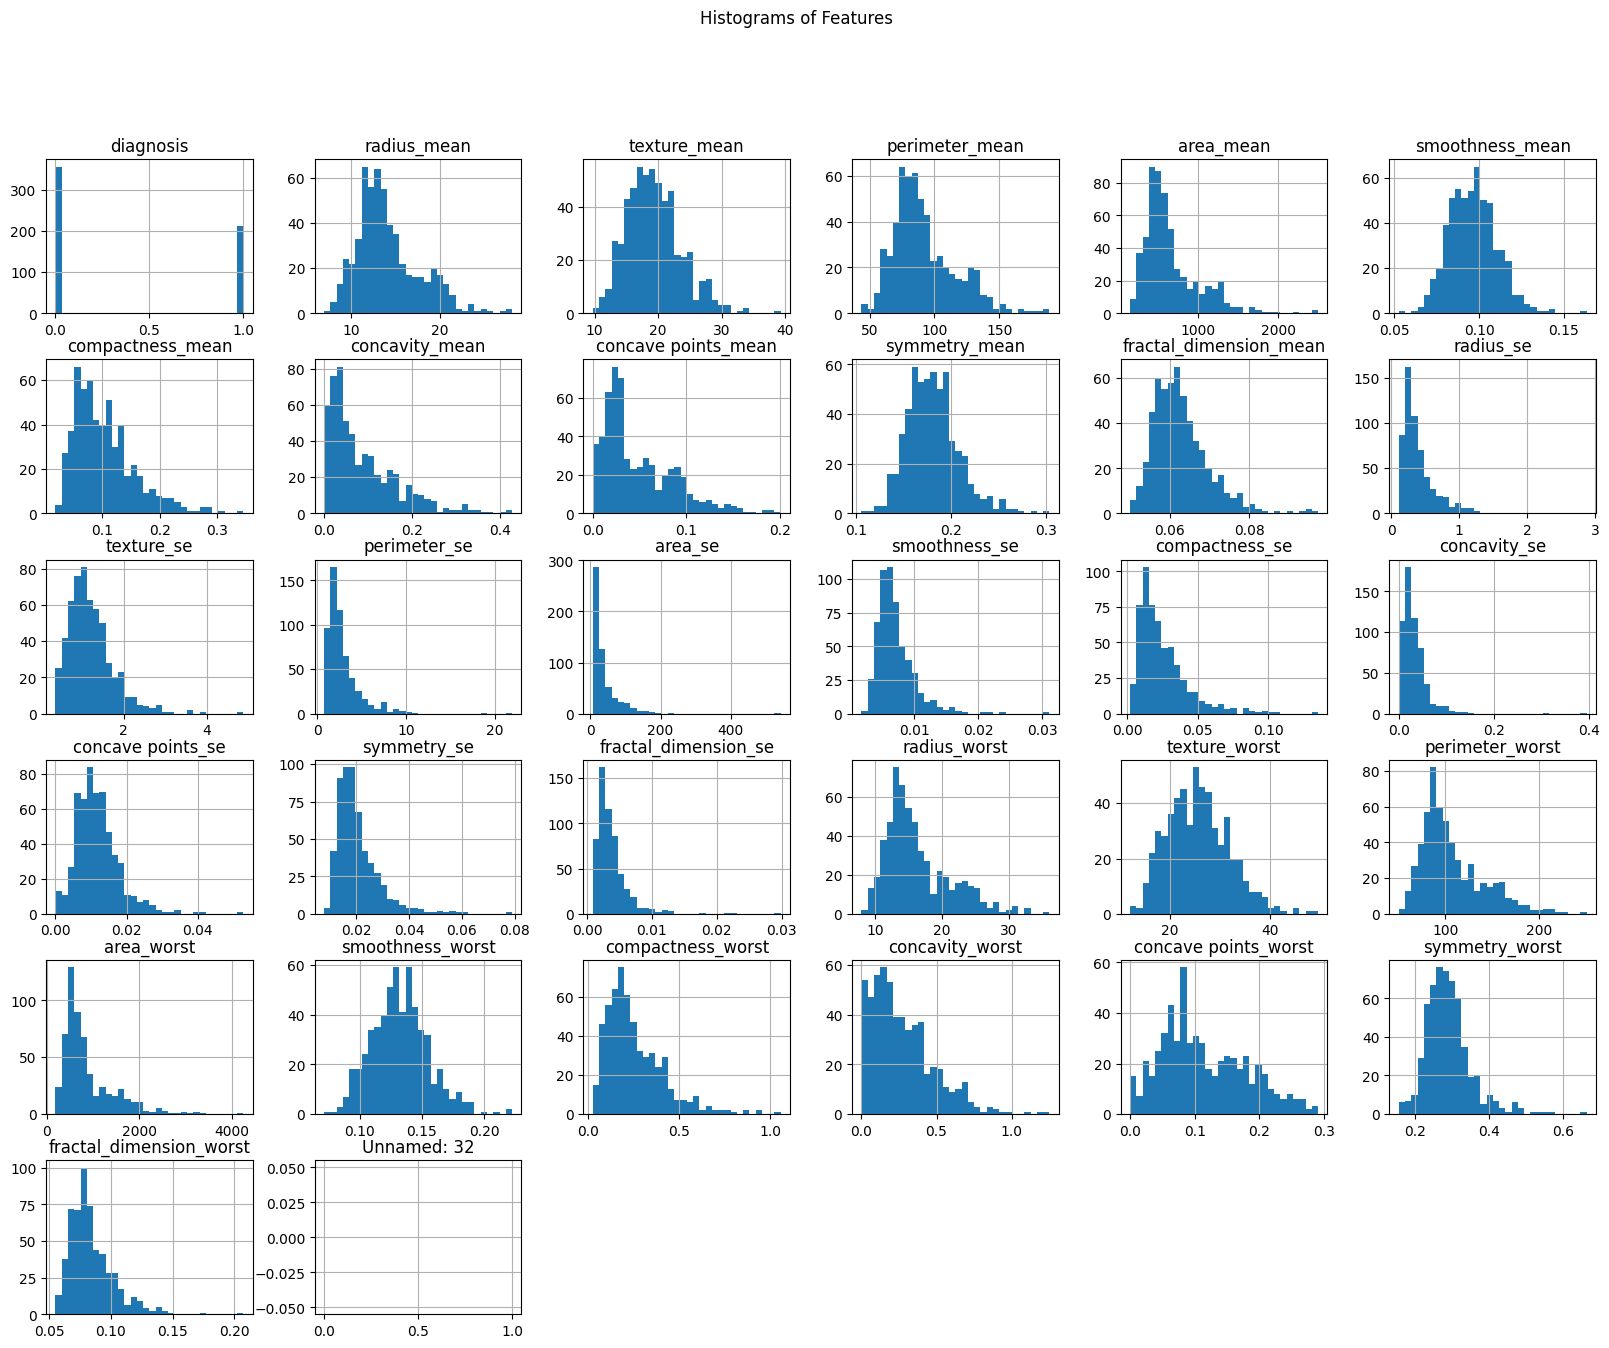

In [11]:
data.iloc[:, 1:].hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Features')
plt.show()


## Step 5: Check Correlations


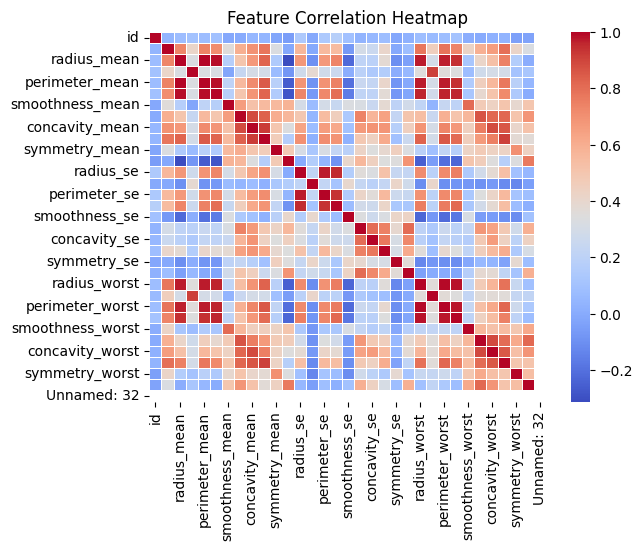

In [12]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


### Highly Correlated Features

In [13]:
high_corr = corr_matrix['diagnosis'][corr_matrix['diagnosis'].abs() > 0.5]
print(high_corr.sort_values(ascending=False))


diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
Name: diagnosis, dtype: float64


## Step 6: Visualize Relationships
- Pairplot

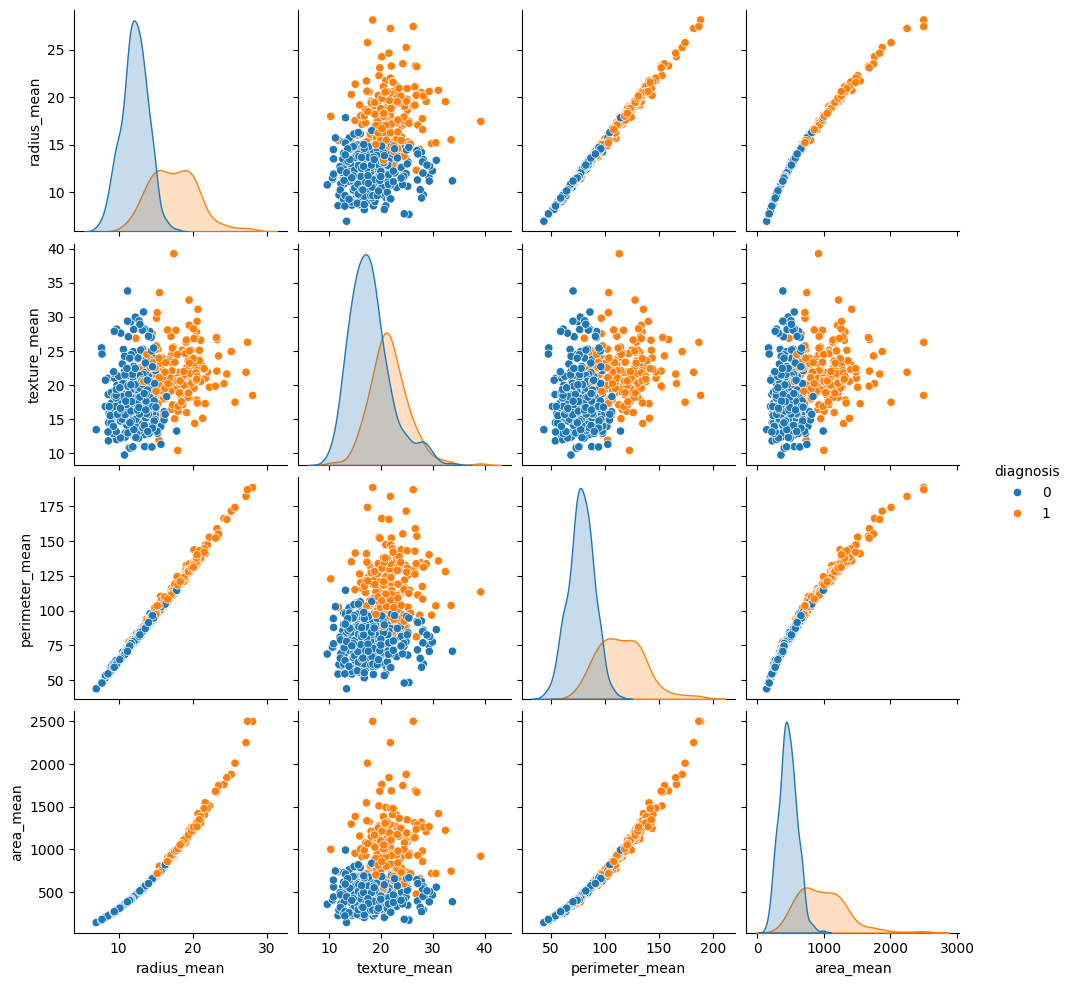

In [14]:
sns.pairplot(data, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], hue='diagnosis')
plt.show()


- Boxplots for Specific Features

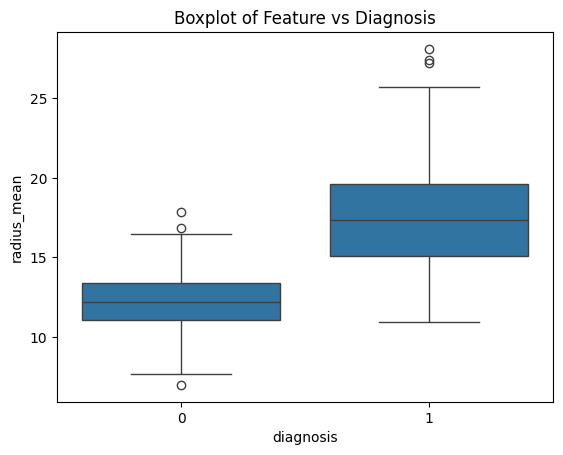

In [15]:
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title('Boxplot of Feature vs Diagnosis')
plt.show()


## Step 7: Outlier Detection
- Univariate Outliers

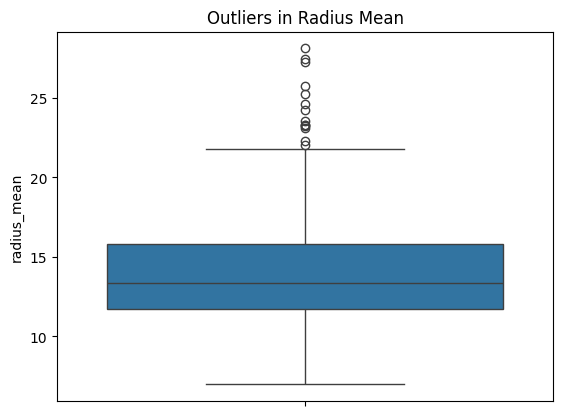

In [16]:
sns.boxplot(data['radius_mean'])
plt.title('Outliers in Radius Mean')
plt.show()


## Step 8: Data Balance


In [17]:
print(data['diagnosis'].value_counts(normalize=True))


diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


### If imbalance exists, consider oversampling or undersampling

In [18]:
from sklearn.utils import resample

data_majority = data[data['diagnosis'] == 0]
data_minority = data[data['diagnosis'] == 1]

data_minority_upsampled = resample(data_minority, 
                                   replace=True, 
                                   n_samples=len(data_majority), 
                                   random_state=42)

data_balanced = pd.concat([data_majority, data_minority_upsampled])


In [19]:

# Drop 'id' column if it's not useful
data = data.drop(columns=['id'])


In [20]:

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']


In [21]:

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

# Step 3: Train the Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = clf.predict(X_test)


In [28]:

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9298245614035088

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


Confusion Matrix:
 [[67  4]
 [ 4 39]]


In [29]:

# Visualize the Decision Tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- concave points_mean <= 0.05
|   |--- radius_worst <= 16.83
|   |   |--- area_se <= 48.70
|   |   |   |--- smoothness_worst <= 0.18
|   |   |   |   |--- smoothness_se <= 0.00
|   |   |   |   |   |--- symmetry_mean <= 0.18
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- symmetry_mean >  0.18
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- smoothness_se >  0.00
|   |   |   |   |   |--- texture_worst <= 33.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- texture_worst >  33.35
|   |   |   |   |   |   |--- texture_worst <= 33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- texture_worst >  33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- smoothness_worst >  0.18
|   |   |   |   |--- class: 1
|   |   |--- area_se >  48.70
|   |   |   |--- concavity_mean <= 0.03
|   |   |   |   |--- class: 1
|   |   |   |--- concavity_mean >  0.03
|   |   |   |   |--- class: 0
|   |--- radius_worst

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd


In [32]:
y_pred = clf.predict(X_test)  # Generate predictions


In [33]:
from sklearn.metrics import classification_report

# Generate the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()  # Convert to DataFrame


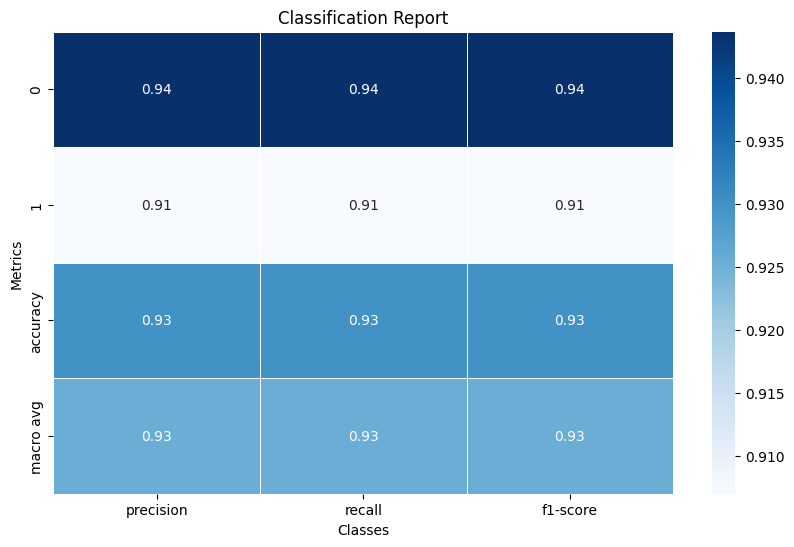

In [34]:
# Step 3: Generate Classification Report as DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Step 4: Plot the Classification Report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Classification Report")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()